# **Predición de la temperatura de Popayán con RNA (ML)**

In [ ]:
!pip install -U scikit-learn

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import *
import itertools

In [ ]:
# Objeto Series con el conjunto de datos.
url='https://drive.google.com/file/d/1btPxJ_zmHLbBdfUCSbOn3so7gQlHkuPV/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

#url='/content/popayan.csv'
df_temp = pd.read_csv(url,sep=';', decimal=',',index_col=0)
df_temp.head()

,tavg,tmin,tmax,prcp,wdir,wspd,pres
date,,,,,,,
2/01/2021,16.4,13.3,19.5,31.5,162,5.5,1014.8
3/01/2021,16.4,14.2,19.6,7.3,185,4.1,1014.9
4/01/2021,16.7,13.8,21.2,37.4,234,5.3,1013.8
5/01/2021,16.3,14.5,19.4,19.4,244,4.4,1014.2
6/01/2021,16.4,14.3,19.9,7.8,174,4.7,1015.0


In [ ]:
mintemp=df_temp[['tmin']]
mintemp

,tmin
date,
2/01/2021,13.3
3/01/2021,14.2
4/01/2021,13.8
5/01/2021,14.5
6/01/2021,14.3
...,...
2/03/2024,15.2
3/03/2024,15.0
4/03/2024,15.4


In [ ]:
mintemp.describe()

,tmin
count,1160.000000
mean,13.693190
std,1.131217
min,9.000000
25%,13.000000
50%,13.900000
75%,14.500000
max,16.500000


In [ ]:
nan_count = mintemp['tmin'].isna().sum()
nan_count

0

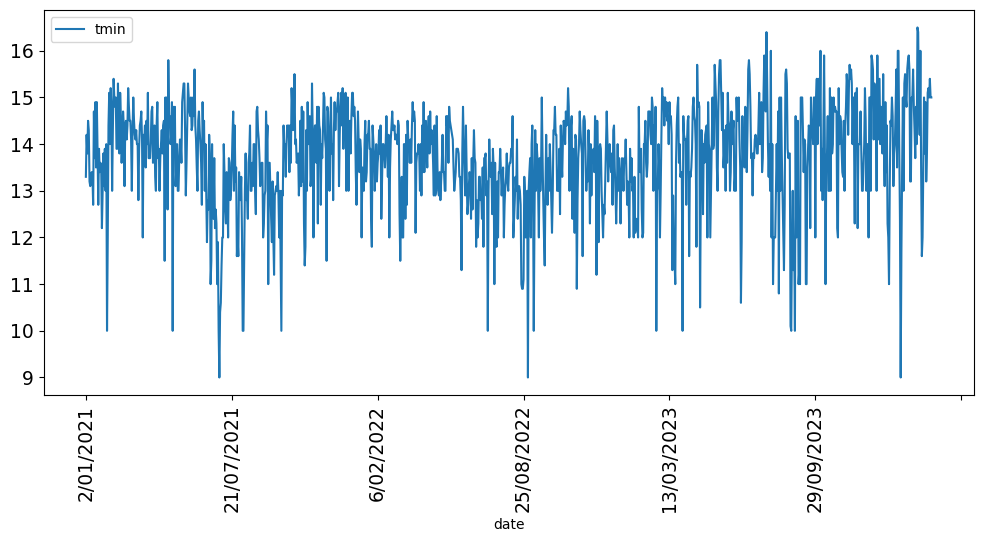

In [ ]:
mintemp.plot(rot=90, figsize = (12, 5), fontsize = 13.5);

In [ ]:
data_train = mintemp.loc[:'31/10/2023']
data_test  = mintemp.loc['31/10/2023':]

In [ ]:
def sliding_time(lst=[], window_size=1):
  X=[]
  y=[]
  for i in range (0,len(lst)-window_size-1):
    past_time_steep=lst[i:i+window_size]
    future_time_steep=lst[i+window_size]
    X.append(past_time_steep)
    y.append(future_time_steep)
  return X, y

In [ ]:
a=[1,2,3,4,5,6,7,8,9,10,11]
sliding_time(a,5)

([[1, 2, 3, 4, 5],
  [2, 3, 4, 5, 6],
  [3, 4, 5, 6, 7],
  [4, 5, 6, 7, 8],
  [5, 6, 7, 8, 9]],
 [6, 7, 8, 9, 10])

In [ ]:
serie_train=data_train['tmin'].to_list()
serie_test=data_test['tmin'].to_list()

In [ ]:
WINDOW_SIZE=3

In [ ]:
X_train, y_train = sliding_time(serie_train, WINDOW_SIZE)
print(X_train)
print(y_train)

[[13.3, 14.2, 13.8], [14.2, 13.8, 14.5], [13.8, 14.5, 14.3], [14.5, 14.3, 13.2], [14.3, 13.2, 13.1], [13.2, 13.1, 13.2], [13.1, 13.2, 13.4], [13.2, 13.4, 13.3], [13.4, 13.3, 12.7], [13.3, 12.7, 14.7], [12.7, 14.7, 13.7], [14.7, 13.7, 14.9], [13.7, 14.9, 13.5], [14.9, 13.5, 14.9], [13.5, 14.9, 13.9], [14.9, 13.9, 12.7], [13.9, 12.7, 13.9], [12.7, 13.9, 13.4], [13.9, 13.4, 13.6], [13.4, 13.6, 13.5], [13.6, 13.5, 12.2], [13.5, 12.2, 13.0], [12.2, 13.0, 13.8], [13.0, 13.8, 13.1], [13.8, 13.1, 13.9], [13.1, 13.9, 13.0], [13.9, 13.0, 14.0], [13.0, 14.0, 10.0], [14.0, 10.0, 12.0], [10.0, 12.0, 14.4], [12.0, 14.4, 15.1], [14.4, 15.1, 14.0], [15.1, 14.0, 15.2], [14.0, 15.2, 14.8], [15.2, 14.8, 13.0], [14.8, 13.0, 14.3], [13.0, 14.3, 15.4], [14.3, 15.4, 15.0], [15.4, 15.0, 14.8], [15.0, 14.8, 15.0], [14.8, 15.0, 13.9], [15.0, 13.9, 13.9], [13.9, 13.9, 15.3], [13.9, 15.3, 14.0], [15.3, 14.0, 13.8], [14.0, 13.8, 15.1], [13.8, 15.1, 14.6], [15.1, 14.6, 13.6], [14.6, 13.6, 14.0], [13.6, 14.0, 14.7],

In [ ]:
X_test, y_test = sliding_time(serie_test, WINDOW_SIZE)
print(X_test)
print(y_test)

[[15.2, 14.0, 14.6], [14.0, 14.6, 14.5], [14.6, 14.5, 13.9], [14.5, 13.9, 13.4], [13.9, 13.4, 13.3], [13.4, 13.3, 14.5], [13.3, 14.5, 13.0], [14.5, 13.0, 14.4], [13.0, 14.4, 14.8], [14.4, 14.8, 15.5], [14.8, 15.5, 15.2], [15.5, 15.2, 14.2], [15.2, 14.2, 15.2], [14.2, 15.2, 15.7], [15.2, 15.7, 15.4], [15.7, 15.4, 15.6], [15.4, 15.6, 15.3], [15.6, 15.3, 14.0], [15.3, 14.0, 15.0], [14.0, 15.0, 14.2], [15.0, 14.2, 12.3], [14.2, 12.3, 15.1], [12.3, 15.1, 14.7], [15.1, 14.7, 15.2], [14.7, 15.2, 12.2], [15.2, 12.2, 14.0], [12.2, 14.0, 14.0], [14.0, 14.0, 14.0], [14.0, 14.0, 14.7], [14.0, 14.7, 13.9], [14.7, 13.9, 13.0], [13.9, 13.0, 13.0], [13.0, 13.0, 13.5], [13.0, 13.5, 14.0], [13.5, 14.0, 15.2], [14.0, 15.2, 14.5], [15.2, 14.5, 13.0], [14.5, 13.0, 14.0], [13.0, 14.0, 14.0], [14.0, 14.0, 12.0], [14.0, 12.0, 15.0], [12.0, 15.0, 15.0], [15.0, 15.0, 13.0], [15.0, 13.0, 15.9], [13.0, 15.9, 15.8], [15.9, 15.8, 15.6], [15.8, 15.6, 14.1], [15.6, 14.1, 15.3], [14.1, 15.3, 14.9], [15.3, 14.9, 14.8],

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(solver = 'adam',
                   activation = 'relu',
                   hidden_layer_sizes=(120,40,10),
                   max_iter=500,
                   learning_rate='adaptive',
                   learning_rate_init=0.001,
                   tol=1e-21,
                   verbose=True)

In [ ]:
model.fit(X_train, y_train)

Iteration 1, loss = 77.07415936
Iteration 2, loss = 49.92985037
Iteration 3, loss = 33.63714812
Iteration 4, loss = 18.95224690
Iteration 5, loss = 7.50955724
Iteration 6, loss = 1.50356129
Iteration 7, loss = 0.91157636
Iteration 8, loss = 1.45011951
Iteration 9, loss = 0.76482884
Iteration 10, loss = 0.71653702
Iteration 11, loss = 0.73483835
Iteration 12, loss = 0.63336297
Iteration 13, loss = 0.65252377
Iteration 14, loss = 0.62436907
Iteration 15, loss = 0.61741973
Iteration 16, loss = 0.61470869
Iteration 17, loss = 0.61344444
Iteration 18, loss = 0.61265139
Iteration 19, loss = 0.61080608
Iteration 20, loss = 0.61023807
Iteration 21, loss = 0.61049204
Iteration 22, loss = 0.60728153
Iteration 23, loss = 0.60655668
Iteration 24, loss = 0.60672775
Iteration 25, loss = 0.60378867
Iteration 26, loss = 0.60310371
Iteration 27, loss = 0.60215148
Iteration 28, loss = 0.60033333
Iteration 29, loss = 0.60041063
Iteration 30, loss = 0.59820457
Iteration 31, loss = 0.59678257
Iteration 32,

MLPRegressor(hidden_layer_sizes=(120, 40, 10), learning_rate='adaptive',
             max_iter=500, tol=1e-21, verbose=True)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

y_pred = model.predict(X_test)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")

Test Mean Squared Error: 	1.5279
Test Mean Absolute Error: 	0.9692
Test Mean squared log error: 	0.0073


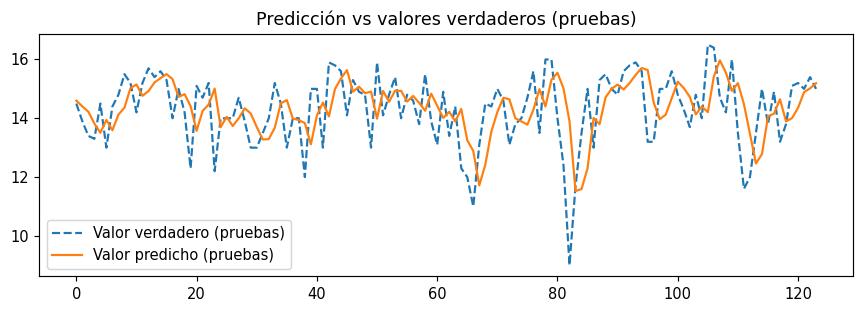

In [ ]:

x=range(0,len(y_test))
plt.figure(figsize=(10,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();

In [ ]:
ultimas_temp=[[23,22,21]]
manana=model.predict(ultimas_temp)
print(manana)

[21.40915411]


In [ ]:
ultimas_temp=[21,18,15]
for i in range (0,30):
  manana=model.predict([ultimas_temp])
  print(manana)
  ultimas_temp.append(manana[0])
  ultimas_temp=ultimas_temp[-3:]



[17.44209637]
[16.99673482]
[16.70495479]
[16.81886672]
[16.6977098]
[16.59438655]
[16.542315]
[16.46479944]
[16.39019186]
[16.32418314]
[16.25674338]
[16.19116168]
[16.12830244]
[16.06682318]
[16.00706153]
[15.9491082]
[15.89274928]
[15.83798253]
[15.78478338]
[15.73308658]
[15.68285436]
[15.63404814]
[15.58662486]
[15.54054584]
[15.49577338]
[15.45227012]
[15.41000012]
[15.36892848]
[15.32902119]
[15.29024524]


# **Ejercicio**


Exportaciones de cafe (Enlace Precio, área y produción de cafe), utilizar el precio por día/mes para contruir una red neuronal artificial que aproxime el pre

https://federaciondecafeteros.org/wp/estadisticas-cafeteras/


Taller utilizar el dataset de Mackey-Glass time series

https://figshare.com/articles/dataset/Mackey-Glass_time_series/4233584

# **Red neuronal que aproxima el precio del café**

Carga del Dataset

In [ ]:

#file_path = '/content/Cafe Nuevo Dataset.xlsx'
file2 = '/content/Cafe Nuevo Dataset - 1.Precio Interno Diario .csv'
precio_interno_diario = pd.read_csv(file2)
#hectareas_cafe_anual = pd.read_excel(xls, '2.Área cultivada con café total')
#produccion_mensual = pd.read_excel(xls, '3.Producción mensual')
#cosecha_anual = pd.read_excel(xls, '4.Valor de la cosecha registrad')

Columnas del Dataset a analizar.

In [ ]:
print(precio_interno_diario.columns)

Index(['Fecha', 'Precio Interno ($/125 Kg)'], dtype='object')


**Contenido del Dataset**

In [ ]:
print("Precio Interno Diario:")
print(precio_interno_diario.head(10))

"""print("\nHectareas de café anual:")
print(hectareas_cafe_anual.head(10))

print("\nProducción mensual:")
print(produccion_mensual.head(10))

print("\nCosecha anual:")
print(cosecha_anual.head(10))"""


Precio Interno Diario:
       Fecha Precio Interno ($/125 Kg)
0   1/2/2003                  277,000 
1   1/3/2003                  280,875 
2   1/4/2003                  280,875 
3   1/5/2003                  280,875 
4   1/6/2003                  281,500 
5   1/7/2003                  294,875 
6   1/8/2003                  317,375 
7   1/9/2003                  319,125 
8  1/10/2003                  331,375 
9  1/11/2003                  331,375 


'print("\nHectareas de café anual:")\nprint(hectareas_cafe_anual.head(10))\n\nprint("\nProducción mensual:")\nprint(produccion_mensual.head(10))\n\nprint("\nCosecha anual:")\nprint(cosecha_anual.head(10))'

**Preparación del contenido**

In [ ]:
url='/content/Cafe Nuevo Dataset - 1.Precio Interno Diario .csv'
df_temp = pd.read_csv(url,sep=',', decimal=',',index_col=0)
df_temp.head()

,Precio Interno ($/125 Kg)
Fecha,
1/2/2003,"277,000"
1/3/2003,"280,875"
1/4/2003,"280,875"
1/5/2003,"280,875"
1/6/2003,"281,500"


reemplazar **' , '** para que sea posible la lectura de los valores en el entrenamiento

In [ ]:
mintemp['Precio Interno ($/125 Kg)'] = mintemp['Precio Interno ($/125 Kg)'].str.replace(',', '').astype(float)

Resultado

In [ ]:
mintemp=df_temp[['Precio Interno ($/125 Kg)']]
mintemp

,Precio Interno ($/125 Kg)
Fecha,
1/2/2003,"277,000"
1/3/2003,"280,875"
1/4/2003,"280,875"
1/5/2003,"280,875"
1/6/2003,"281,500"
...,...
9/4/2024,"2,018,000"
9/5/2024,"2,016,000"
9/6/2024,"1,953,000"


**Analisis del dataset**

In [ ]:
mintemp.describe()

,Precio Interno ($/125 Kg)
count,7910
unique,3114
top,"800,000"
freq,49


In [ ]:
mintemp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7910 entries, 1/2/2003 to 9/8/2024
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Precio Interno ($/125 Kg)  7910 non-null   object
dtypes: object(1)
memory usage: 123.6+ KB


**Nulos**

In [ ]:
nan_count = mintemp['Precio Interno ($/125 Kg)'].isna().sum()
nan_count

0

In [ ]:
mintemp

,Precio Interno ($/125 Kg)
Fecha,
1/2/2003,"277,000"
1/3/2003,"280,875"
1/4/2003,"280,875"
1/5/2003,"280,875"
1/6/2003,"281,500"
...,...
9/4/2024,"2,018,000"
9/5/2024,"2,016,000"
9/6/2024,"1,953,000"


***Caracterizar datos para el 70% de entrenamiento y 30% para prueba***

In [ ]:
filas_5535_a_5538 = df_temp.iloc[5534:5538]
print(filas_5535_a_5538)

         Precio Interno ($/125 Kg)
Fecha                             
3/1/2018                  760,000 
3/2/2018                  753,000 
3/3/2018                  753,000 
3/4/2018                  753,000 


Convertir de pandas a numericos

In [ ]:
mintemp = mintemp.apply(pd.to_numeric, errors='coerce')


**Analisis del cambio de precios a medida del tiempo**

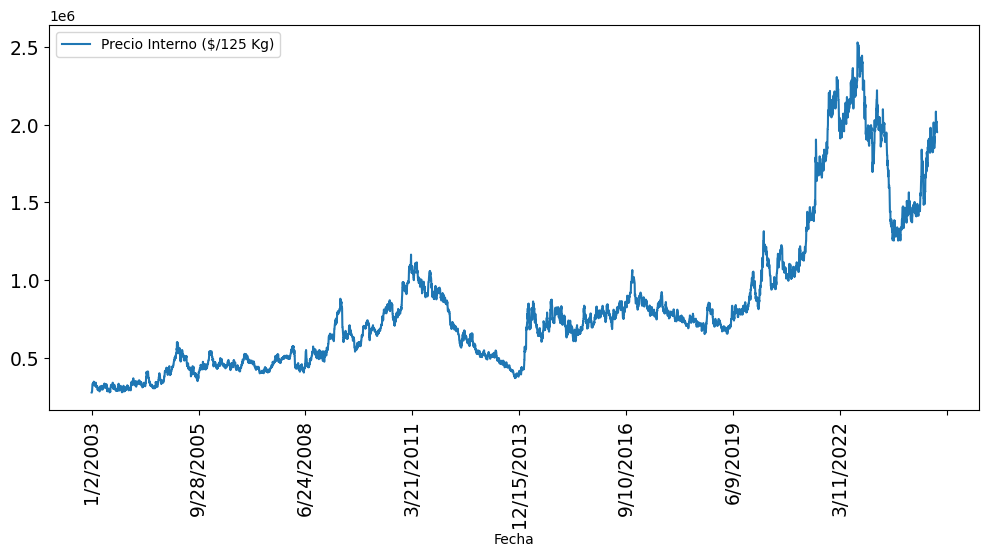

In [ ]:
mintemp.plot(rot=90, figsize = (12, 5), fontsize = 13.5);

Una vez encontrada la fecha que separa al 70% del 30%, segmentamos el dataset para el entrenamiento

In [ ]:
data_train = mintemp.loc[:'3/2/2018']
data_test  = mintemp.loc['3/2/2018':]

Creamos nuestra ventana deslizante

In [ ]:
def sliding_time(lst=[], window_size=1):
  X=[]
  y=[]
  for i in range (0,len(lst)-window_size-1):
    past_time_steep=lst[i:i+window_size]
    future_time_steep=lst[i+window_size]
    X.append(past_time_steep)
    y.append(future_time_steep)
  return X, y

**Fijamos la columna sobre la que queremos predecir**

In [ ]:
serie_train=data_train['Precio Interno ($/125 Kg)'].to_list()
serie_test=data_test['Precio Interno ($/125 Kg)'].to_list()



*   Nos disponemos a evaluar mediante el uso de metricas que nos permitan medir la efectividad del modelo.
*   Se realiza la regresión lineal para reducir la complejidad de los datos




Exportamos las bibliotecas necesarias

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
import numpy as np

**Se realiza el entrenamiento**

In [ ]:

scaler = StandardScaler()
mintemp[['Precio Interno ($/125 Kg)']] = scaler.fit_transform(mintemp[['Precio Interno ($/125 Kg)']])

#Cantidad de datos almacenados para cada objeti
print(f"X_train shape: {np.array(X_train).shape}")
print(f"y_train shape: {np.array(y_train).shape}")
print(f"X_test shape: {np.array(X_test).shape}")
print(f"y_test shape: {np.array(y_test).shape}")

model = MLPRegressor(hidden_layer_sizes=(120, 40, 10), learning_rate='adaptive', max_iter=500, verbose=True)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


#Se imprime el error cuadratico y absoluto
print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")




X_train shape: (5532, 3)
y_train shape: (5532,)
X_test shape: (2371, 3)
y_test shape: (2371,)
Iteration 1, loss = 0.04479539
Iteration 2, loss = 0.00171812
Iteration 3, loss = 0.00049293
Iteration 4, loss = 0.00042171
Iteration 5, loss = 0.00040516
Iteration 6, loss = 0.00039167
Iteration 7, loss = 0.00037747
Iteration 8, loss = 0.00036478
Iteration 9, loss = 0.00035521
Iteration 10, loss = 0.00035037
Iteration 11, loss = 0.00033687
Iteration 12, loss = 0.00032715
Iteration 13, loss = 0.00031976
Iteration 14, loss = 0.00033141
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Test Mean Squared Error: 	0.0085
Test Mean Absolute Error: 	0.0633


**Usamos un plot para observar la efectividad de predicción del modelo**

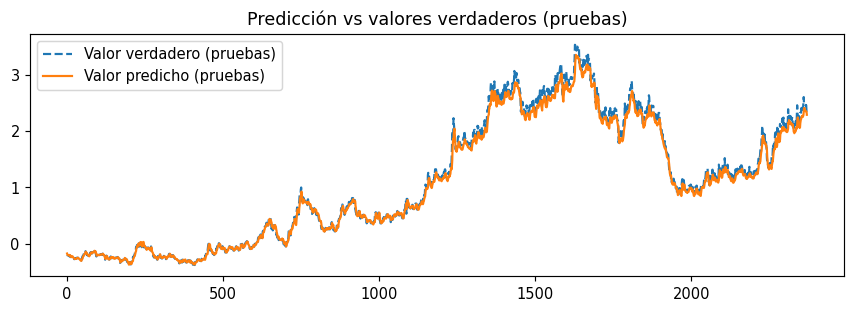

In [ ]:
x=range(0,len(y_test))
plt.figure(figsize=(10,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();